In [ ]:
!pip3 list 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as scp

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import sensitivity_score

from scipy.io import loadmat
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist

from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, MetaEstimatorMixin
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import MDS, TSNE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, plot_confusion_matrix, make_scorer, roc_curve, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, cross_validate
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import check_X_y
from sklearn.utils.class_weight import compute_class_weight

from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

In [ ]:
def main():
  df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)
  #df = pd.read_csv('qsar_oral_toxicity_reduce.csv', sep=',')
  #df = df.drop(columns=['Unnamed: 0'])
  dfw = df.iloc[:,:1024]

  #res = ACPwCorr(df)
  #TSNE2(df,2)
  ACP(df,.95)
  #KMEAN(res,4,'random')

  # X = list()
  # for i in range(25):
  #   x = np.random.choice(8890,100)
  #   tmp = df2.iloc[x,:]
  #   X.append(tmp)

  # list_DF = list()
  # for i in X:
  #   tmp = i.iloc[:,:1024]
  #   list_DF.append(pd.DataFrame(distance_matrix(tmp.values, tmp.values), index=tmp.index, columns=tmp.index))

  # for i in list_DF:
  #   x = AFTD(i,2)
  #   KMEAN(x,2,'random')





main()

Tentative d'ACP avec une matrice réduite des colonnes avec une correlation >.9

In [ ]:
 def ACPwCorr(df):
    dfw = df.iloc[:,:1024]
    corr = dfw.corr()
    print(corr)
    Y = list()
    for i in range(1024):
      for j in range(i):
        if abs(corr.iloc[i,j]) > .9 and i != j:
          if i not in Y:
            Y.append(i)
          if j not in Y:
            Y.append(j)

    Y.sort()
    df2 = dfw.iloc[:,Y]
    #df2['classe'] = df[df.index == Y,1024]
    print(df2)

    cp = ACP(df2,3)
    sns.scatterplot(x=cp['Axe 1'], y=cp['Axe 2'], data=cp)
    plt.show()
    sns.scatterplot(x=cp['Axe 1'], y=cp['Axe 3'], hue=df[1024], data=cp)
    plt.show()
    sns.scatterplot(x=cp['Axe 2'], y=cp['Axe 3'], hue=df[1024], data=cp)
    plt.show()
    return cp

ACP

In [ ]:
def ACP(df, n):
    dfw = df.iloc[:,:1024]
    pca = PCA(n_components=n)
    model = pca.fit_transform(dfw)
    if n >= 1:
      labels = ['Axe ' + str(i + 1) for i in range(n)]
    else:
      labels = ['Axe ' + str(i + 1) for i in range(model.shape[1])]

    result = pd.DataFrame(data=model, columns=labels)

    print('Axes principaux:')
    print(pca.components_)

    print('Composantes principales:')
    print(model)

    print('Pourcentage d\'inerties expliquée par chaque axe:')
    print(pca.explained_variance_ratio_)

    print('Pourcentage cumulé:')
    print(sum(pca.explained_variance_ratio_))

    plt.figure(1, figsize=(10,10))
    sns.barplot(x=labels, y=pca.explained_variance_ratio_).set_title('Pourcentage d\'inerties expliquée par chaque axe')

    if n == 2:
         plt.figure(2)
         sns.scatterplot(x='Axe 1', y='Axe 2',hue=df.iloc[:,1024], data=result).set_title('ACP')
        

    # if n == 3:
    #     plt.figure(2)
    #     sns.scatterplot(x='Axe 1', y='Axe 2',hue=df.iloc[:,1024], data=result).set_title('ACP')
    #     plt.figure(3)
    #     sns.scatterplot(x='Axe 1', y='Axe 3',hue=df.iloc[:,1024], data=result).set_title('ACP')
    #     plt.figure(4)
    #     sns.scatterplot(x='Axe 2', y='Axe 3',hue=df.iloc[:,1024], data=result).set_title('ACP')

    plt.show()
    return result

AFTD

In [ ]:
def AFTD(df, n):
    aftd = MDS(n_components=n, dissimilarity='euclidean')
    model = aftd.fit_transform(df)
    labels = ['Axe ' + str(i + 1) for i in range(n)]

    print('Stress:')
    print(aftd.stress_)


    X = pd.DataFrame(model, columns=labels)

    if n == 2:
        X = pd.DataFrame(model, columns=['Axe 1', 'Axe 2'])
        plt.figure(1)
        sns.scatterplot(x='Axe 1', y='Axe 2', hue=t[1024], data=X)

    do, dn = plot_Shepard(aftd)
    plt.show()

    return X


CAH

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
Y = df.iloc[:,1024]

for i in range(8992):
  if df.iloc[i,1024] == 'negative':
    df.iloc[i,1024] = 0
  else:
    df.iloc[i,1024] = 1


#metrics = ['jaccard','matching','dice','kulsinski','rogerstanimoto','russellrao','sokalmichener','sokalsneath']
metrics = ['euclidean','manhattan','hamming','minkowski','jaccard','dice','kulsinski']
res = [] 
for i in metrics:
  cls = AgglomerativeClustering(affinity=i, linkage='complete', n_clusters=2, distance_threshold=None)
  cls.fit(X)
  res.append((i,adjusted_rand_score(cls.labels_,Y)))

newDF = pd.DataFrame(data=res, columns=['Metrics','Rand Score'])
print(newDF)
print(newDF.to_latex())


TSNE

In [ ]:
def TSNE2(df,n):
  dfw = df.iloc[:,:1024]
  corr = dfw.corr()
  Y = list()
  for i in range(1024):
    for j in range(i):
      if abs(corr.iloc[i,j]) > .9 and i != j:
        if i not in Y:
          Y.append(i)
        if j not in Y:
          Y.append(j)
  
  Y.sort()
  df2 = dfw.iloc[:,Y]

  tsne = TSNE(n_components=n)
  model = tsne.fit_transform(df2)
  labels = ['Axe ' + str(i + 1) for i in range(n)]

  result = pd.DataFrame(data=model, columns=labels)
  print(result)

  if n==2:
    sns.scatterplot(x=result['Axe 1'], y=result['Axe 2'], hue=df[1024],data=result)
    plt.show()
  

KMEAN

In [ ]:
def KMEAN(df, n, init):
    km = KMeans(n_clusters=n, init=init).fit(df)
    scatterplot_pca(columns=df.columns, hue=km.labels_, data=df)
    plt.show()

Autres

In [ ]:
def plot_Shepard(mds_model, plot=True):
    """Affiche le diagramme de Shepard et retourne un couple contenant les
    dissimilarités originales et les distances apprises par le
    modèle.
    """

    assert isinstance(mds_model, MDS)

    # Inter-distances apprises
    dist = cdist(mds_model.embedding_, mds_model.embedding_)
    idxs = np.tril_indices_from(dist, k=-1)
    dist_mds = dist[idxs]

    # Inter-distances d'origine
    dist = mds_model.dissimilarity_matrix_
    dist_orig = dist[idxs]

    dists = np.column_stack((dist_orig, dist_mds))

    if plot:
        f, ax = plt.subplots()
        range = [dists.min(), dists.max()]
        ax.plot(range, range, 'r--')
        ax.scatter(*dists.T)
        ax.set_xlabel('Dissimilarités')
        ax.set_ylabel('Distances')

    return (*dists.T,)

def scatterplot_pca(columns=None, hue=None, style=None, data=None, pc1=1, pc2=2, **kwargs):
    """
    Utilise `sns.scatterplot` en appliquant d'abord une ACP si besoin
    pour réduire la dimension.
    """

    # Select columns (should be numeric)
    data_quant = data if columns is None else data[columns]
    data_quant = data_quant.drop(
        columns=[e for e in [hue, style] if e is not None], errors="ignore"
    )

    # Reduce to two dimensions
    if data_quant.shape[1] == 2:
        data_pca = data_quant
        pca = None
    else:
        n_components = max(pc1, pc2)
        pca = PCA(n_components=n_components)
        data_pca = pca.fit_transform(data_quant)
        data_pca = pd.DataFrame(
            data_pca[:, [pc1 - 1, pc2 - 1]], columns=[f"PC{pc1}", f"PC{pc2}"]
        )

    # Keep name, force categorical data for hue and steal index to
    # avoid unwanted alignment
    if isinstance(hue, pd.Series):
        if not hue.name:
            hue.name = "hue"
        hue_name = hue.name
    elif isinstance(hue, str):
        hue_name = hue
        hue = data[hue]
    elif isinstance(hue, np.ndarray):
        hue = pd.Series(hue, name="class")
        hue_name = "class"

    hue = hue.astype("category")
    hue.index = data_pca.index
    hue.name = hue_name

    if isinstance(style, pd.Series):
        if not style.name:
            style.name = "style"
        style_name = style.name
    elif isinstance(style, str):
        style_name = style
        style = data[style]
    elif isinstance(style, np.ndarray):
        style = pd.Series(style, name="style")
        style_name = "style"

    sp_kwargs = {}
    full_data = data_pca
    if hue is not None:
        full_data = pd.concat((full_data, hue), axis=1)
        sp_kwargs["hue"] = hue_name
    if style is not None:
        full_data = pd.concat((full_data, style), axis=1)
        sp_kwargs["style"] = style_name

    x, y = data_pca.columns
    ax = sns.scatterplot(x=x, y=y, data=full_data, **sp_kwargs)

    return ax, pca

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import MDS
from scipy.spatial.distance import cdist

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    default_kwargs = dict(leaf_font_size=10)
    default_kwargs.update(kwargs or {})

    dendrogram(linkage_matrix, **default_kwargs)



def plot_clustering(data, clus1, clus2=None, ax=None, **kwargs):
    """Affiche les données `data` dans le premier plan principal.
    """

    if ax is None:
        ax = plt.gca()

    other_kwargs = {e: kwargs.pop(e) for e in ["centers", "covars"] if e in kwargs}

    ax, pca = scatterplot_pca(data=data, hue=clus1, style=clus2, ax=ax, **kwargs)

    if "centers" in other_kwargs and "covars" in other_kwargs:
        # Hack to get colors
        # TODO use legend_out = True
        levels = [str(l) for l in np.unique(clus1)]
        hdls, labels = ax.get_legend_handles_labels()
        colors = [
            artist.get_facecolor().ravel()
            for artist, label in zip(hdls, labels)
            if label in levels
        ]
        colors = colors[: len(levels)]

        if data.shape[1] == 2:
            centers_2D = other_kwargs["centers"]
            covars_2D = other_kwargs["covars"]
        else:
            centers_2D = pca.transform(other_kwargs["centers"])
            covars_2D = [
                pca.components_ @ c @ pca.components_.T for c in other_kwargs["covars"]
            ]

        p = 0.9
        sig = norm.ppf(p ** (1 / 2))

        for covar_2D, center_2D, color in zip(covars_2D, centers_2D, colors):
            v, w = linalg.eigh(covar_2D)
            v = 2.0 * sig * np.sqrt(v)

            u = w[0] / linalg.norm(w[0])
            if u[0] == 0:
                angle = np.pi / 2
            else:
                angle = np.arctan(u[1] / u[0])

            angle = 180.0 * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(center_2D, v[0], v[1], 180.0 + angle, color=color)
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ax.add_artist(ell)

    return ax, pca

def add_decision_boundary(model, levels=None, resolution=1000, ax=None, label=None, color=None):
    """Trace une frontière de décision sur une figure existante.
                    
    La fonction utilise `model` pour prédire un score ou une classe
    sur une grille de taille `resolution`x`resolution`. Une (ou
    plusieurs frontières) sont ensuite tracées d'après le paramètre
    `levels` qui fixe la valeur des lignes de niveaux recherchées.
    """
    if ax is None:
        ax = plt.gca()
    if callable(model):
        if levels is None:
            levels = [0]
        def predict(X):
            return model(X)
    else:
        n_classes = len(model.classes_)
        if n_classes == 2:
            if hasattr(model, "decision_function"):
                if levels is None:
                    levels = [0]
                def predict(X):
                    return model.decision_function(X)
            elif hasattr(model, "predict_proba"):
                if levels is None:
                    levels = [.5]
                def predict(X):
                    pred = model.predict_proba(X)
                    if pred.shape[1] > 1:
                        return pred[:, 0]
                    else:
                        return pred
            elif hasattr(model, "predict"):
                if levels is None:
                    levels = [.5]
                def predict(X):
                    return model.predict(X)
            else:
                raise Exception("Modèle pas reconnu")
        else:
            levels = np.arange(n_classes - 1) + .5
            def predict(X):
                pred = model.predict(X)
                _, idxs = np.unique(pred, return_inverse=True)
                return idxs
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], resolution)
    yy = np.linspace(ylim[0], ylim[1], resolution)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = predict(xy).reshape(XX.shape)
    color = "red" if color is None else color
    sns.lineplot([0], [0], label=label, ax=ax, color=color, linestyle="dashed")
    ax.contour(
        XX,
        YY,
        Z,
        levels=levels,
        colors=[color],
        linestyles="dashed",
        antialiased=True,
    )

KNN

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
#X = ACP(X,0.95)
Y = df.iloc[:,1024]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

classifier = KNeighborsClassifier(n_neighbors=10,metric='hamming')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(classification_report(Y_test,Y_pred))

'''
Note that in binary classification, 
recall of the positive class is also known as “sensitivity”; 
recall of the negative class is “specificity”. 
sensitivity = true positive rate, specificity = true negative rate
'''


#plot_confusion_matrix(classifier,X_test,Y_test)
#plt.show()


              precision    recall  f1-score   support

    negative       0.94      0.99      0.97      2057
    positive       0.80      0.35      0.48       191

    accuracy                           0.94      2248
   macro avg       0.87      0.67      0.72      2248
weighted avg       0.93      0.94      0.93      2248



'\nNote that in binary classification, \nrecall of the positive class is also known as “sensitivity”; \nrecall of the negative class is “specificity”. \nsensitivity = true positive rate, specificity = true negative rate\n'

KNN cross validation

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
Y = df.iloc[:,1024]

#Y.loc[Y == 'negative'] = 0
#Y.loc[Y == 'positive'] = 1

n_folds = 5
res = knn_cross_validation(X,Y,n_folds,[5*(i+1) for i in range(20)])

acc = [0 for i in range(20)]
sensitivity = [0 for i in range(20)]
label = [f'{5*(i+1)} voisins' for i in range(20)]
for i in res:
  cmp = 0
  for j in i:
    sensitivity[cmp] += j[1][0]
    acc[cmp] += j[1][1]
    cmp += 1

sensitivity = [sensitivity[i]/5 for i in range(20)]
acc = [acc[i]/5 for i in range(20)]

for i in range(20):
  print(f'Sensitivity for {5*(i+1)} neighbours : {sensitivity[i]}%')
  print(f'Accuracy for {5*(i+1)} neighbours : {acc[i]}%')


dic = {'sensitivity': sensitivity, 'accuracy': acc}
newDf = pd.DataFrame(data=dic)
sns.scatterplot(x='sensitivity', y='accuracy', data=newDf, hue=label)
plt.show()    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

KNN find best k

In [ ]:
df = pd.read_csv('Neighbours _Accuracy_Sensitivity.txt', sep='\s+')

print(df)

fig, ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(df['Neighbours'],df['Accuracy'],'x--')
ax[0].set(xlabel='k', ylabel='accuracy')
ax[0].set_xticks(np.arange(0, 100, step=5))

ax[1].plot(df['Neighbours'],df['Sensitivity'],'x--')
ax[1].set(xlabel='k', ylabel='sensitivity')
ax[1].set_xticks(np.arange(0, 100, step=5))



KNN - GridSearchCV

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
Y = df.iloc[:,1024]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

neighbors = [i for i in range(1,11)]
metrics = ['euclidean','manhattan','hamming','minkowski','jaccard','dice','kulsinski']
scoring = {'accuracy': 'accuracy','recall':make_scorer(recall_score,pos_label='positive')}

grid_params = {
    'n_neighbors': neighbors,
    'metric': metrics,
}

cls = KNeighborsClassifier()

gs = GridSearchCV(cls, param_grid=grid_params, scoring=scoring, refit='recall')
gs.fit(X_train,Y_train)

Y_pred = gs.predict(X_test)
print(classification_report(Y_test,Y_pred))

print('Best score: ', gs.best_score_)
print('Best parameters: ', gs.best_params_)
print('Best estimators: ',gs.best_estimator_)
print('Results: ',gs.cv_results_)

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
Y = df.iloc[:,1024]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

undersample = RandomUnderSampler(random_state=0)
X_train2, Y_train2 = undersample.fit_resample(X_train, Y_train)

oversample = SMOTE()
X_train3, Y_train3 = oversample.fit_resample(X_train,Y_train)

cls = KNeighborsClassifier(n_neighbors=1, metric='kulsinski')

l = [(X_train,Y_train),(X_train2,Y_train2),(X_train3,Y_train3)]
  
for i,j in l:
  cls.fit(i,j)
  Y_pred = cls.predict(X_test)
  print(classification_report(Y_test,Y_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

    negative       0.96      0.95      0.95      2060
    positive       0.50      0.54      0.52       188

    accuracy                           0.92      2248
   macro avg       0.73      0.75      0.74      2248
weighted avg       0.92      0.92      0.92      2248

              precision    recall  f1-score   support

    negative       0.98      0.66      0.79      2060
    positive       0.18      0.82      0.30       188

    accuracy                           0.68      2248
   macro avg       0.58      0.74      0.54      2248
weighted avg       0.91      0.68      0.75      2248

              precision    recall  f1-score   support

    negative       0.96      0.95      0.95      2060
    positive       0.48      0.54      0.51       188

    accuracy                           0.91      2248
   macro avg       0.72      0.74      0.73      2248
weighted avg       0.92      0.91      0.92      2248



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
Y = df.iloc[:,1024]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

cls = KNeighborsClassifier(n_neighbors=1, metric='kulsinski')
cls.fit(X_train,Y_train)

plot_clustering(X,Y)
add_decision_boundary(cls)
plt.show()



Bernoulli Naïve Bayes

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
Y = df.iloc[:,1024]

#undersample = RandomUnderSampler(random_state=0)
#X, Y = undersample.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

#oversample = SMOTE()
#X_train, Y_train = oversample.fit_resample(X_train,Y_train)

#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

classifier = BernoulliNB()
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))



In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)
X = df.iloc[:,:-1]
Y = df.iloc[:,1024]
#acp = ACP(X,0.95)
cross = knn_cross_validation(X, Y, 10, [1, 3, 5, 10, 15])
acc = []
neigh = []
for i in cross:
    for j in i:
        neigh.append(j[0])
        acc.append(j[1])
acc_cross_df = pd.DataFrame(data=neigh, columns=['voisins'])
acc_cross_df['acc']=acc


sns.lineplot(x=neigh, y=acc)
plt.show()

Quadratic Discriminant Analysis

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
Y = df.iloc[:,1024]

#oversample = SMOTE()
#X, Y = oversample.fit_resample(X,Y)

#undersample = RandomUnderSampler(random_state=0)
#X, Y = undersample.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

cls = QuadraticDiscriminantAnalysis()
cls.fit(X_train, Y_train)

Y_pred = cls.predict(X_test)
print(classification_report(Y_test,Y_pred))

Linear Discriminant Analysis

In [ ]:
#df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)
df = pd.read_csv('qsar_oral_toxicity_reduce.csv', sep=',', header=None)

X = df.iloc[:,:-1]
Y = df.iloc[:,1024]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

#oversample = SMOTE()
#X_train, Y_train = oversample.fit_resample(X_train,Y_train)

#undersample = RandomUnderSampler(random_state=0)
#X_train, Y_train = undersample.fit_resample(X_train, Y_train)

cls = LinearDiscriminantAnalysis()
cls.fit(X_train, Y_train)

Y_pred = cls.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2192
           1       0.74      0.51      0.60        49

    accuracy                           0.99      2241
   macro avg       0.86      0.75      0.80      2241
weighted avg       0.98      0.99      0.98      2241



Decision Tree Classifier

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
Y = df.iloc[:,1024]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

scoring = {'accuracy': 'accuracy','recall':make_scorer(recall_score,pos_label='positive')}

grid_params = {
    'max_depth': range(1,100,5),
    'min_samples_split' : range(2,50),
    'class_weight' : ['balanced']
}

cls = DecisionTreeClassifier()

gs = GridSearchCV(cls, param_grid=grid_params, scoring=scoring, refit='recall')
gs.fit(X_train,Y_train)

Y_pred = gs.predict(X_test)
print(classification_report(Y_test,Y_pred))

print('Best score: ', gs.best_score_)
print('Best parameters: ', gs.best_params_)
print('Best estimators: ',gs.best_estimator_)

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
Y = df.iloc[:,1024]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

cls = DecisionTreeClassifier(max_depth=11,min_samples_split=49)
cls.fit(X_train, Y_train)

Y_pred = cls.predict(X_test)
print(classification_report(Y_test,Y_pred))

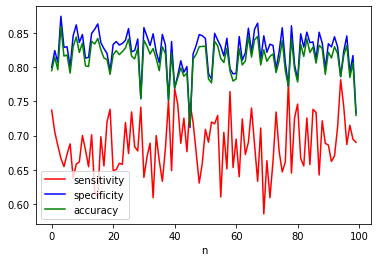

In [ ]:
from sklearn.tree import plot_tree
import sklearn.tree as tree
import graphviz

df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
Y = df.iloc[:,1024]

res = []
for i in range(100):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)
  cls = DecisionTreeClassifier(max_depth=11,min_samples_split=49, class_weight='balanced')
  cls.fit(X_train, Y_train)

  Y_pred = cls.predict(X_test)
  res.append((recall_score(Y_test,Y_pred,pos_label='positive'),recall_score(Y_test,Y_pred,pos_label='negative'),accuracy_score(Y_test,Y_pred)))

df = pd.DataFrame(data=res, columns=['sensitivity','specificity','accuracy'])

plt.plot(df.index,df['sensitivity'],'r',df.index,df['specificity'],'b',df.index,df['accuracy'],'g')
plt.xlabel('n')
plt.legend(['sensitivity','specificity','accuracy'])


#plt.figure()
#plot_tree(cls, filled=True)
plt.show()

#
#graph = graphviz.Source(tree.export_graphviz(cls))
#graph.render()

Random Forest Classifier

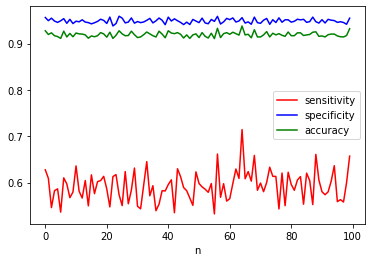

In [ ]:
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
# X = ACP(df,.95)
Y = df.iloc[:,1024]

res = []

for i in range(100):
  X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

  cls = RandomForestClassifier(max_depth=11,min_samples_split=49, class_weight='balanced')
  cls.fit(X_train, Y_train)

  Y_pred = cls.predict(X_test)
  res.append((recall_score(Y_test,Y_pred,pos_label='positive'),recall_score(Y_test,Y_pred,pos_label='negative'),accuracy_score(Y_test,Y_pred)))

df = pd.DataFrame(data=res, columns=['sensitivity','specificity','accuracy'])
plt.plot(df.index,df['sensitivity'],'r',df.index,df['specificity'],'b',df.index,df['accuracy'],'g')
plt.xlabel('n')
plt.legend(['sensitivity','specificity','accuracy'])
plt.show()

Bagging

In [ ]:
from sklearn.tree import plot_tree
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
#X = ACP(df,.95)
Y = df.iloc[:,1024]

res = []

#for i in range(100):
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

cls = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=11,min_samples_split=49, class_weight='balanced'))
cls.fit(X_train, Y_train)

Y_pred = cls.predict(X_test)
#res.append((recall_score(Y_test,Y_pred,pos_label='positive'),recall_score(Y_test,Y_pred,pos_label='negative'),accuracy_score(Y_test,Y_pred)))

#df = pd.DataFrame(data=res, columns=['sensitivity','specificity','accuracy'])
#plt.plot(df.index,df['sensitivity'],'r',df.index,df['specificity'],'b',df.index,df['accuracy'],'g')

print(classification_report(Y_test,Y_pred))
#plot_tree(cls, filled=True)
#plt.show()

              precision    recall  f1-score   support

    negative       0.97      0.93      0.95      2070
    positive       0.45      0.66      0.54       178

    accuracy                           0.91      2248
   macro avg       0.71      0.79      0.74      2248
weighted avg       0.93      0.91      0.92      2248



Decision Tree vs Bagging vs Random Forest

<Figure size 432x288 with 0 Axes>

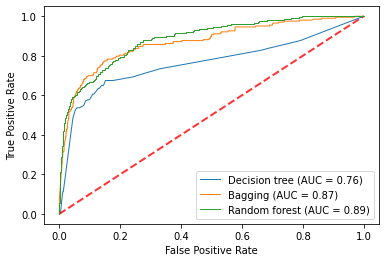

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import sklearn.tree as tree
import graphviz

df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

for i in range(8992):
  if df.iloc[i,1024] == 'negative':
    df.iloc[i,1024] = 0
  else:
    df.iloc[i,1024] = 1

X = df.iloc[:,:-1]
Y = df.iloc[:,1024].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

cls = DecisionTreeClassifier(max_depth=11,min_samples_split=49, class_weight='balanced')
cls2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=11,min_samples_split=49, class_weight='balanced'))
cls3 = RandomForestClassifier(max_depth=11,min_samples_split=49, class_weight='balanced')

cls.fit(X_train,Y_train)
cls2.fit(X_train,Y_train)
cls3.fit(X_train,Y_train)

Y_pred = cls.predict(X_test)
Y_pred2 = cls2.predict(X_test)
Y_pred3 = cls3.predict(X_test)

fpr,tpr,_ = roc_curve(Y_test, Y_pred)
fpr2,tpr2,_ = roc_curve(Y_test, Y_pred2)
fpr3,tpr3,_ = roc_curve(Y_test, Y_pred3)

#print(classification_report(Y_test,Y_pred))
#print(classification_report(Y_test,Y_pred2))
#print(classification_report(Y_test,Y_pred3))

plt.figure(1)
#plt.plot(fpr,tpr,'r',fpr2,tpr2,'b',fpr3,tpr3,'g')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

x = plot_roc_curve(cls, X_test, Y_test, lw=1, name='Decision tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
y = plot_roc_curve(cls2, X_test, Y_test, lw=1, name='Bagging', ax=x.ax_)
z = plot_roc_curve(cls3, X_test, Y_test, lw=1, name='Random forest', ax=x.ax_)


plt.show()

In [ ]:
def accuracy(X_train, y_train, X_test, y_test, n_neighbors):
    """Précision d'un modèle Knn pour un jeu de données
    d'apprentissage et de validation fournis."""

    # Définition, apprentissage et prédiction par la méthode des
    # plus proches voisins avec `n_neighbors` voisins
    cls = KNeighborsClassifier(n_neighbors=n_neighbors)
    cls.fit(X_train, y_train)
    y_predict = cls.predict(X_test)

    # Calcul de la précision avec `accuracy_score`
    #acc = accuracy_score(y_val, y_pred)
    #acc = recall_score(y_val, y_pred, pos_label=['negative','positive'])
    return recall_score(y_test, y_predict, pos_label='positive'), accuracy_score(y_test,y_predict)

def knn_cross_validation(X, y, n_folds, n_neighbors_list):
    """Génère les couples nombre de voisins et précisions correspondantes."""

    # Conversion en tableau numpy si on fournit des DataFrame par exemple
    X, y = check_X_y(X, y)

    def models_accuracies(train_index, val_index, n_neighbors_list):
        """Précision de tous les modèles pour un jeu de données fixé."""

        # Création de `X_train`, `y_train`, `X_val` et `y_val`
        X_train = X[train_index]
        X_val = X[val_index]
        Y_train = y[train_index]
        Y_val = y[val_index]

        oversample = SMOTE()
        X_train, Y_train = oversample.fit_resample(X_train,Y_train)

        # Calcul des précisions pour chaque nombre de voisins présent
        # dans `n_neighbors`
        for i in n_neighbors_list:
            yield i, accuracy(X_train, Y_train, X_val, Y_val, i)

    # Définition de `n_splits` jeu de données avec `ShuffleSplit`
    ms = KFold(n_splits=n_folds)

    # Calcul et retour des précisions avec `models_accuracies` pour
    # chaque jeu de données défini par `ShuffleSplit`.
    acc = []
    sensitivity = []
    for train, validation in ms.split(X):
        yield  models_accuracies(train, validation, n_neighbors_list)
        

In [ ]:
def validation_errors(X,y,cls):
    for i in cls:
        yield cross_validate(i,X,y, cv=10 , scoring=['accuracy'])

df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

cls = [LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), GaussianNB(), BernoulliNB()]
name = ['LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis', 'GaussianNB', 'BernoulliNB']

gen = validation_errors(X,y,cls)

res = pd.DataFrame()
res['cv'] = [i + 1 for i in range(10)]

for i in name:
    print(next(gen))

pd.set_option('display.max_columns', None)
#print(res)
pd.reset_option('display.max_columns')



Correlation

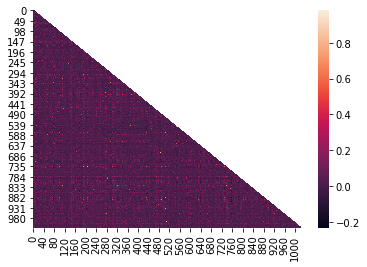

ValueError: ignored

In [ ]:
import random
from sklearn.metrics import plot_confusion_matrix

df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]


corr = X.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask)
plt.show()

delV = list()
for i in range(corr.shape[0]):
  for j in range(corr.shape[1]):
    if corr[i][j] > 0.9 and i!=j:
      if i not in delV and j not in delV:
        tmp = random.randint(0,1)
        if tmp == 1:
          delV.append(j)
        else:
          delV.append(i)

X = X.drop(delV, axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

classifier = LogisticRegression(class_weight='balanced')
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test,Y_pred))
plot_confusion_matrix(classifier,X_test,Y_test)
plt.show()


Logistic Regression

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)
#df = pd.read_csv('qsar_oral_toxicity_reduce.csv', sep=',')
#df = df.drop(columns=['Unnamed: 0'])

print(df)

X = df.iloc[:,:-1]
# X = ACP(df, 0.95)
Y = df.iloc[:,1024]

#X = ACP(df,0.95)

#Y.loc[Y == 'negative'] = 0
#Y.loc[Y == 'positive'] = 1

#undersample = RandomUnderSampler(random_state=0)
#X, Y = undersample.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

# oversample = SMOTE()
# X_train, Y_train = oversample.fit_resample(X_train,Y_train)

classifier = LogisticRegression(class_weight='balanced')
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test, Y_pred))


Exploration - Individus

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)


# Que des 0 et negatif
a = []
# Que des 1 et positif
b = []
# Que des 0 et positif => error
c = []
# Un seul 1 et positif
d = []
# Au moins un 1 et négatif
e = [] 
#
f = [] 

for i in range(df.shape[0]):
  if sum(df.iloc[i,:1023]) == 0 and df.iloc[i,1024] == 'negative':
    a.append(i)
  if sum(df.iloc[i,:1023]) == 1023 and df.iloc[i,1024] == 'positive':
    b.append(i)
  if sum(df.iloc[i,:1023]) == 0 and df.iloc[i,1024] == 'positive':
    c.append(i)
  if sum(df.iloc[i,:1023]) == 1 and df.iloc[i,1024] == 'positive':
    d.append(i)
  if sum(df.iloc[i,:1023]) > 0 and df.iloc[i,1024] == 'negative':
    e.append((sum(df.iloc[i,:1023]),i))
  if sum(df.iloc[i,:1023]) > 0 and df.iloc[i,1024] == 'positive':
    f.append((sum(df.iloc[i,:1023]),i))

print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(e)

Exploration - Variables

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)


for i in range(8992):
  if df.iloc[i,1024] == 'negative':
    df.iloc[i,1024] = 0
  else:
    df.iloc[i,1024] = 1

similarity = pd.DataFrame()
#for i in range(1024):
#  if df.iloc[:,i].equals(df.iloc[:,1024]):
#    print(i)

idx = df.index[df.iloc[:,1024] == 1].to_list()

print(idx)

#for i in idx:
#  print(i, df.iloc[i,:1023].to_numpy())

[7, 26, 36, 43, 60, 81, 96, 105, 106, 107, 132, 148, 152, 155, 156, 190, 193, 307, 327, 328, 329, 339, 343, 345, 347, 354, 387, 409, 412, 437, 446, 449, 488, 492, 538, 620, 635, 639, 650, 665, 675, 700, 751, 784, 792, 825, 872, 873, 874, 875, 876, 879, 950, 953, 980, 984, 989, 1001, 1025, 1041, 1046, 1049, 1075, 1079, 1149, 1150, 1240, 1243, 1285, 1313, 1333, 1350, 1360, 1364, 1388, 1389, 1390, 1391, 1392, 1423, 1435, 1445, 1453, 1475, 1476, 1480, 1489, 1492, 1496, 1511, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1550, 1566, 1569, 1585, 1595, 1625, 1631, 1633, 1637, 1641, 1655, 1656, 1670, 1710, 1715, 1725, 1726, 1736, 1741, 1744, 1749, 1757, 1761, 1770, 1784, 1796, 1834, 1839, 1892, 1893, 1919, 1949, 1951, 1996, 2020, 2022, 2029, 2032, 2033, 2034, 2037, 2042, 2083, 2091, 2114, 2118, 2120, 2133, 2143, 2152, 2180, 2198, 2201, 2213, 2214, 2220, 2223, 2224, 2234, 2237, 2238, 2240, 2241, 2243, 2271, 2274, 2280, 2294, 2295, 2296, 2297, 2298, 2300, 2312, 2346, 2347, 2350, 2373, 2375, 2391, 24

Check pattern

In [ ]:
import pandas as pd

df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

pattern_negative = []
pattern_positive = []


for i in range(df.shape[0]):
  tmp = list()
  lst = list()
  if df.iloc[i,1024] == 'negative':
    tmp = df.iloc[i,:1023].to_list()
    for j in range(len(tmp)):
      if tmp[j] == 1:
        lst.append(j)
    pattern_negative.append((i,lst))
  else:
    tmp = df.iloc[i,:1023].to_list()
    for j in range(len(tmp)):
      if tmp[j] == 1:
        lst.append(j)
    pattern_positive.append((i,lst))

#print(pattern_positive[1])
#print(pattern_negative)

l = []

for i in pattern_positive:
  for j in pattern_negative:
    if len([w for w in j[1] if w in i[1]]) == len(i[1])  and len(i[1])==len(j[1]):
      print(i,j,[w for w in i[1] if w not in j[1]])
      l.append(i[0])
      l.append(j[0])

print(l)
delete = np.unique(l)
newDF = df.drop(index=delete)
newDF.to_csv('qsar_oral_toxicity_reduce.csv')

'''
for i in pattern_positive:
  for j in pattern_negative:
    for k in range(1,6):
      if len([w for w in j[1] if w in i[1]]) == len(i[1])-k  and len(i[1])==len(j[1]):
        print(i[0],j[0],[w for w in i[1] if w not in j[1]])
        l[k-1].append((i[0],[w for w in i[1] if w not in j[1]]))

print(l)
'''

Création de proba

In [ ]:
import pandas as pd

df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

pattern_negative = []
pattern_positive = []


for i in range(df.shape[0]):
  tmp = list()
  lst = list()
  if df.iloc[i,1024] == 'negative':
    tmp = df.iloc[i,:1023].to_list()
    for j in range(len(tmp)):
      if tmp[j] == 1:
        lst.append(j)
    pattern_negative.append((i,lst))
  else:
    tmp = df.iloc[i,:1023].to_list()
    for j in range(len(tmp)):
      if tmp[j] == 1:
        lst.append(j)
    pattern_positive.append((i,lst))


l = []


for i in pattern_positive:
  for j in pattern_negative:
    for k in range(1,6):
      if len([w for w in j[1] if w in i[1]]) == len(i[1]) and len(i[1])==len(j[1]):
        l.append((i[0],j[0]))

drop = [(i[0],0) for i in l]
df['proba'] = [0 for i in range(df.shape[0])]

delete = []
for i in l:
  for j in drop:
    if i[0] == j[0]:
      j[1] +=1
      delete.append(i[1])

for i in pattern_positive:
  for j in pattern_positive:
    if len([w for w in j[1] if w in i[1]]) == len(i[1]):
      delete.append(j[0])

for i in pattern_negative:
  for j in pattern_negative:
    if len([w for w in j[1] if w in i[1]]) == len(i[1]):
      delete.append(j[0])

delete = np.unique(delete)


for i in range(df.shape[0]):
  its = False
  for j in drop:
    if i == j[0]:
      df.iloc[i,-1] == 1/(j[1]+1)
      its = True
  if its == False:
    if df.iloc[i,1024] == 'positive':
      df.iloc[i,-1] == 1
    else:
      df.iloc[i,-1] == 0



df = df.drop(index=delete)



df.to_csv('qsar_oral_toxicity_proba.csv')





TypeError: ignored

Suppression

In [ ]:
df = pd.read_csv('qsar_oral_toxicity.csv', sep=';', header=None)

cov = np.cov(df.iloc[:,:-1])
newDF = pd.DataFrame(data=cov)
newDF.shape

In [ ]:
df = pd.read_csv('qsar_oral_toxicity_proba.csv', sep=',', header=1)
print(df)
df = df.drop(index=[0])
print(df)